###Predict The Stock Market  With ML/ Python

This code performs stock market prediction on the S&P 500 index (ticker symbol: ^GSPC) using a Random Forest classifier. It includes:

1. Data fetching and preprocessing

2. Feature engineering

3. Model training and backtesting

4. Evaluation of performance





###1. Data Collection and Caching

In [39]:
#Downloading S&P price data
#Downloads the entire history of the S&P 500 index from Yahoo Finance if the data isn't already saved.
import yfinance as yf

In [40]:
sp500 = yf.Ticker("^GSPC")

In [41]:
#Cleaning and visualizing our stock market data
sp500 = sp500.history(period="max")

In [42]:
sp500

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1927-12-30 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,0.0,0.0
1928-01-03 00:00:00-05:00,17.760000,17.760000,17.760000,17.760000,0,0.0,0.0
1928-01-04 00:00:00-05:00,17.719999,17.719999,17.719999,17.719999,0,0.0,0.0
1928-01-05 00:00:00-05:00,17.549999,17.549999,17.549999,17.549999,0,0.0,0.0
1928-01-06 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,0.0,0.0
...,...,...,...,...,...,...,...
2025-05-15 00:00:00-04:00,5869.819824,5924.209961,5865.160156,5916.930176,4991290000,0.0,0.0
2025-05-16 00:00:00-04:00,5929.089844,5958.620117,5907.359863,5958.379883,4850850000,0.0,0.0
2025-05-19 00:00:00-04:00,5902.879883,5968.609863,5895.689941,5963.600098,4144010000,0.0,0.0


In [43]:
sp500.index

DatetimeIndex(['1927-12-30 00:00:00-05:00', '1928-01-03 00:00:00-05:00',
               '1928-01-04 00:00:00-05:00', '1928-01-05 00:00:00-05:00',
               '1928-01-06 00:00:00-05:00', '1928-01-09 00:00:00-05:00',
               '1928-01-10 00:00:00-05:00', '1928-01-11 00:00:00-05:00',
               '1928-01-12 00:00:00-05:00', '1928-01-13 00:00:00-05:00',
               ...
               '2025-05-08 00:00:00-04:00', '2025-05-09 00:00:00-04:00',
               '2025-05-12 00:00:00-04:00', '2025-05-13 00:00:00-04:00',
               '2025-05-14 00:00:00-04:00', '2025-05-15 00:00:00-04:00',
               '2025-05-16 00:00:00-04:00', '2025-05-19 00:00:00-04:00',
               '2025-05-20 00:00:00-04:00', '2025-05-21 00:00:00-04:00'],
              dtype='datetime64[ns, America/New_York]', name='Date', length=24463, freq=None)

##2. Initial Plot and Cleanup

<Axes: xlabel='Date'>

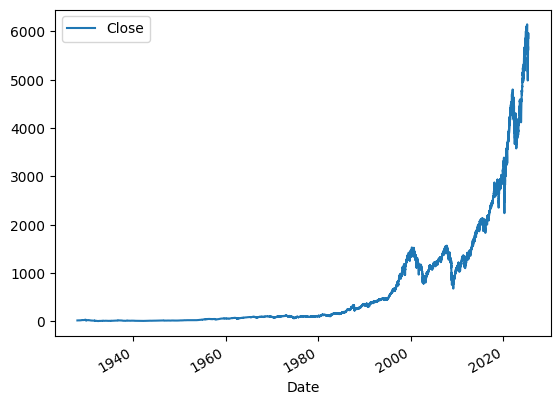

In [44]:
#Plots the closing price of the S&P 500 over time.
sp500.plot.line(y='Close',use_index=True)

In [45]:
#These columns are not useful for this predictive model and are removed.
del sp500['Dividends']
del sp500['Stock Splits']

In [46]:
sp500.head(5)

,Open,High,Low,Close,Volume
Date,,,,,
1927-12-30 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0
1928-01-03 00:00:00-05:00,17.760000,17.760000,17.760000,17.760000,0
1928-01-04 00:00:00-05:00,17.719999,17.719999,17.719999,17.719999,0
1928-01-05 00:00:00-05:00,17.549999,17.549999,17.549999,17.549999,0
1928-01-06 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0


In [47]:
#Setting up our target for machine learning
#Tomorrow = next day’s closing price.
sp500["Tomorrow"]=sp500["Close"].shift(-1)

In [48]:
sp500

,Open,High,Low,Close,Volume,Tomorrow
Date,,,,,,
1927-12-30 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,17.760000
1928-01-03 00:00:00-05:00,17.760000,17.760000,17.760000,17.760000,0,17.719999
1928-01-04 00:00:00-05:00,17.719999,17.719999,17.719999,17.719999,0,17.549999
1928-01-05 00:00:00-05:00,17.549999,17.549999,17.549999,17.549999,0,17.660000
1928-01-06 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,17.500000
...,...,...,...,...,...,...
2025-05-15 00:00:00-04:00,5869.819824,5924.209961,5865.160156,5916.930176,4991290000,5958.379883
2025-05-16 00:00:00-04:00,5929.089844,5958.620117,5907.359863,5958.379883,4850850000,5963.600098
2025-05-19 00:00:00-04:00,5902.879883,5968.609863,5895.689941,5963.600098,4144010000,5940.459961


In [49]:
#Target = 1 if the next day’s close is higher, else 0 (binary classification).

sp500["Target"]=(sp500["Tomorrow"]>sp500["Close"]).astype(int)


In [50]:
sp500.head(20)

,Open,High,Low,Close,Volume,Tomorrow,Target
Date,,,,,,,
1927-12-30 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,17.760000,1
1928-01-03 00:00:00-05:00,17.760000,17.760000,17.760000,17.760000,0,17.719999,0
1928-01-04 00:00:00-05:00,17.719999,17.719999,17.719999,17.719999,0,17.549999,0
1928-01-05 00:00:00-05:00,17.549999,17.549999,17.549999,17.549999,0,17.660000,1
1928-01-06 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,17.500000,0
1928-01-09 00:00:00-05:00,17.500000,17.500000,17.500000,17.500000,0,17.370001,0
1928-01-10 00:00:00-05:00,17.370001,17.370001,17.370001,17.370001,0,17.350000,0
1928-01-11 00:00:00-05:00,17.350000,17.350000,17.350000,17.350000,0,17.469999,1
1928-01-12 00:00:00-05:00,17.469999,17.469999,17.469999,17.469999,0,17.580000,1


In [51]:
sp500=sp500.loc["1990-01-01":].copy()
sp500.head(20)
#Focus only on data from 1990 onwards.

,Open,High,Low,Close,Volume,Tomorrow,Target
Date,,,,,,,
1990-01-02 00:00:00-05:00,353.399994,359.690002,351.980011,359.690002,162070000,358.760010,0
1990-01-03 00:00:00-05:00,359.690002,360.589996,357.890015,358.760010,192330000,355.670013,0
1990-01-04 00:00:00-05:00,358.760010,358.760010,352.890015,355.670013,177000000,352.200012,0
1990-01-05 00:00:00-05:00,355.670013,355.670013,351.350006,352.200012,158530000,353.790009,1
1990-01-08 00:00:00-05:00,352.200012,354.239990,350.540009,353.790009,140110000,349.619995,0
1990-01-09 00:00:00-05:00,353.829987,354.170013,349.609985,349.619995,155210000,347.309998,0
1990-01-10 00:00:00-05:00,349.619995,349.619995,344.320007,347.309998,175990000,348.529999,1
1990-01-11 00:00:00-05:00,347.309998,350.140015,347.309998,348.529999,154390000,339.929993,0
1990-01-12 00:00:00-05:00,348.529999,348.529999,339.489990,339.929993,183880000,337.000000,0


##Basic Model Training & Evaluation

In [52]:
#Training an initial machine learning model
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=100,min_samples_split=100,random_state=1)
train = sp500.iloc[:-100]#Uses last 100 rows as test set.
#Predictors are basic stock price metrics.
test = sp500.iloc[-100:]
predictors = ["Close","Volume","Open","High","Low"]
model.fit(train[predictors],train["Target"])
#A random forest model with 100 trees, and a minimum of 100 samples required to split a node.



RandomForestClassifier(min_samples_split=100, random_state=1)

In [ ]:
RandomForestClassifier(min_samples_split=100, random_state=1)

In [53]:
from sklearn.metrics import precision_score
preds = model.predict(test[predictors])


In [54]:
import pandas as pd
preds = pd.Series(preds,index=test.index)

In [55]:
precision_score(test["Target"],preds)
#Trains the model and evaluates it using precision.


0.5972222222222222

In [56]:
combined = pd.concat([test["Target"],preds],axis=1)


<Axes: xlabel='Date'>

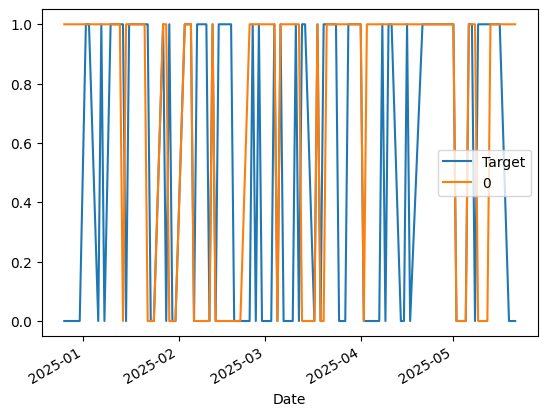

In [57]:
combined.plot()

In [58]:
# Building a backtesting system
def predict(train,test,predictors,model):
  model.fit(train[predictors],train["Target"])
  preds = model.predict(test[predictors])
  preds = pd.Series(preds,index=test.index,name="Predictions")
  combined = pd.concat([test["Target"],preds],axis=1)
  return combined


In [59]:
def backtest(data,model,predictors,start=2500,step=250):
  all_predictions = []
  for i in range(start,data.shape[0],step):
    train = data.iloc[0:i].copy()
    test = data.iloc[i:(i+step)].copy()
    predictions = predict(train,test,predictors,model)
    all_predictions.append(predictions)
  return pd.concat(all_predictions)


#predict(): fits model on training data and makes predictions.

#backtest(): simulates walk-forward validation. Starts training on start rows, then iteratively tests on blocks of step rows.



In [28]:
predictions = backtest(sp500,model,predictors)

In [29]:
predictions["Predictions"].value_counts()

,count
Predictions,
0,3748
1,2665


In [30]:
precision_score(predictions["Target"],predictions["Predictions"])

0.5305816135084428

In [31]:
predictions["Target"].value_counts()/predictions.shape[0]

#Evaluate model precision.

#Compare with actual distribution of upward (1) and downward (0) days.

,count
Target,
1,0.53641
0,0.46359


##Feature Engineering: Technical Indicators

In [32]:
# Adding additional predictors to our model
horizons = [2,5,60,250,1000] #These are rolling window sizes: short-term to long-term horizons.
new_predictors =[]
for horizon in horizons:
  rolling_averages = sp500.rolling(horizon).mean()
  ratio_column = f"Close_Ratio_{horizon}"   #Close_Ratio_X = Close / X-day moving average
  sp500[ratio_column] = sp500["Close"]/rolling_averages["Close"]
  trend_column = f"Trend_{horizon}"  #Trend_X = Sum of "Target" over the last X days (i.e., number of up days)
  sp500[trend_column] = sp500.shift(1).rolling(horizon).sum()["Target"]
  new_predictors += [ratio_column]


In [33]:
sp500=sp500.dropna()
sp500

,Open,High,Low,Close,Volume,Tomorrow,Target,Close_Ratio_2,Trend_2,Close_Ratio_5,Trend_5,Close_Ratio_60,Trend_60,Close_Ratio_250,Trend_250,Close_Ratio_1000,Trend_1000
Date,,,,,,,,,,,,,,,,,
1993-12-14 00:00:00-05:00,465.730011,466.119995,462.459991,463.059998,275050000,461.839996,0,0.997157,1.0,0.996617,1.0,1.000283,32.0,1.028047,127.0,1.176082,512.0
1993-12-15 00:00:00-05:00,463.059998,463.690002,461.839996,461.839996,331770000,463.339996,1,0.998681,0.0,0.995899,1.0,0.997329,32.0,1.025151,126.0,1.172676,512.0
1993-12-16 00:00:00-05:00,461.859985,463.980011,461.859985,463.339996,284620000,466.380005,1,1.001621,1.0,0.999495,2.0,1.000311,32.0,1.028274,127.0,1.176163,513.0
1993-12-17 00:00:00-05:00,463.339996,466.380005,463.339996,466.380005,363750000,465.850006,0,1.003270,2.0,1.004991,3.0,1.006561,32.0,1.034781,128.0,1.183537,514.0
1993-12-20 00:00:00-05:00,466.380005,466.899994,465.529999,465.850006,255900000,465.299988,0,0.999431,1.0,1.003784,2.0,1.005120,32.0,1.033359,128.0,1.181856,513.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-05-14 00:00:00-04:00,5896.740234,5906.549805,5872.109863,5892.580078,5233450000,5916.930176,1,1.000512,2.0,1.017816,4.0,1.048393,33.0,1.035385,145.0,1.257203,531.0
2025-05-15 00:00:00-04:00,5869.819824,5924.209961,5865.160156,5916.930176,4991290000,5958.379883,1,1.002062,2.0,1.013167,4.0,1.053435,33.0,1.039219,145.0,1.261924,532.0
2025-05-16 00:00:00-04:00,5929.089844,5958.620117,5907.359863,5958.379883,4850850000,5963.600098,1,1.003490,2.0,1.009942,5.0,1.061316,34.0,1.046013,146.0,1.270287,532.0


## Improved Model and Re-testing

In [34]:
#Improving our model
model= RandomForestClassifier(n_estimators=200,min_samples_split=500,random_state=1)
#A more robust model with more trees and slightly looser splitting condition.

In [35]:
def predict(train,test,predictors,model):
  model.fit(train[predictors],train["Target"])
  preds = model.predict_proba(test[predictors])[:,1]
  preds[preds>=.6]=1
  preds[preds<.6]=0
  preds = pd.Series(preds,index=test.index,name="Predictions")
  combined = pd.concat([test["Target"],preds],axis=1)
  return combined
#Uses prediction probability, not just hard predictions.

#Only classifies as 1 (buy signal) if confidence ≥ 60%.

In [36]:
predictions = backtest(sp500,model,new_predictors)
#Backtest with new indicators.

In [37]:
predictions["Predictions"].value_counts()

,count
Predictions,
0.0,5204
1.0,208


In [38]:
precision_score(predictions["Target"],predictions["Predictions"])

0.6009615384615384

In [61]:
predictions["Target"].value_counts() / predictions.shape[0]

,count
Target,
1,0.546009
0,0.453991


In [62]:

predictions

,Target,Predictions
Date,,
2003-11-14 00:00:00-05:00,0,0.0
2003-11-17 00:00:00-05:00,0,0.0
2003-11-18 00:00:00-05:00,1,0.0
2003-11-19 00:00:00-05:00,0,0.0
2003-11-20 00:00:00-05:00,1,0.0
...,...,...
2025-05-14 00:00:00-04:00,1,0.0
2025-05-15 00:00:00-04:00,1,0.0
2025-05-16 00:00:00-04:00,1,0.0


##Summary of Performance
Initial model (basic features): Precision: ~53%

Mostly guessed 0 (down/no rise)

Enhanced model (technical features + proba threshold):

Precision: ~60%

Fewer positive predictions (only when confident)

Used momentum indicators effectively

Final Thoughts

---



This is a well-structured pipeline for predicting short-term S&P 500 direction:

Data fetching → cleaning → modeling → evaluating

Adds technical indicators to capture momentum and trend

Uses backtesting to simulate realistic model performance

Can be expanded by:

Including more features (e.g., RSI, MACD)

Using ensemble methods

Applying risk-adjusted evaluation (e.g., Sharpe ratio)

Let me know if you’d like to optimize the model further, add trading strategies, or visualize performance